In [1]:
import constants
import functions as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Examples

Usage of the moist thermodynamic functions is documented through a number of examples

1. moist adiabat from potential temperature and surface specific humidity.

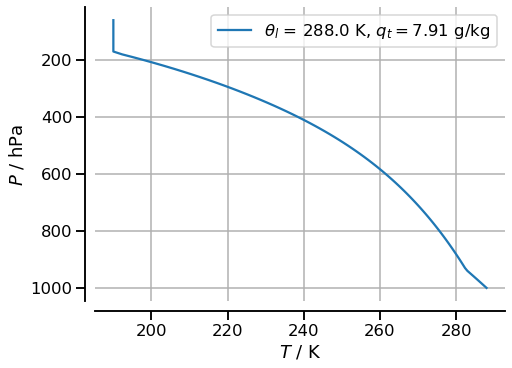

In [2]:
es  = mt.saturation_vapor_pressure_water
p2q = mt.partial_pressure_to_specific_humidity

Tsnd = np.vectorize(mt.T_from_Tl)

Psfc = 100000.
dP   = 1000.
P    = np.arange(Psfc,0.5e4,-dP)

Tl   = 288.
Tmin = 190.
RH   = 0.75
qt   = p2q(RH*es(Tl),Psfc)
TK   = np.maximum(Tsnd(Tl,P,qt),Tmin)

sns.set_context('talk')
fig, ax = plt.subplots(figsize = (7,5), constrained_layout = True)

ax.plot(TK,P/100.,label=f"$\\theta_l$ = {Tl:.1f} K, $q_t = ${1000*qt:.2f} g/kg")
plt.gca().invert_yaxis()
plt.legend()

ax.set_xlabel("$T$ / K")
ax.set_ylabel("$P$ / hPa")
plt.grid()
sns.despine(offset=10)
